### 1.Inspiration /Problem Statement:The goal is to use best regression model and predict House Price Prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling as pp
import plotly.express as px
sn.set()
RANDOM_SEED = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn import metrics
import joblib
import pickle
import time
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
import os
#Setting current working directory
os.chdir("/Users/Zahed/Project-Housing_splitted")

### 2. Data Loading and Description

#### Importing Dataset

In [3]:
# read csv into a dataframe object
df = pd.DataFrame(pd.read_csv("train.csv"))
# show the dataframe
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [4]:
#Having a copy of Original Data Frame for Future Analysis Purpose
new_df = df.copy()

## For Any kind of clarification on the feature names let us refer the below comments
"""
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
"""

#### Dimensionality Check

In [5]:
df.shape

(1168, 81)

##### Observation:The dataset consist of 1168 observations of 81 columns.

#### Variables/Features of the Dataset

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 3.Preprocessing data

* Checking Missing Values
* Checking class imbalancement
* Displaying data types and their Unique values.
* Dropping insignigicant columns with less or no usefull data in it
* Transforming Data/Converting Categorical Columns into Numerical Column
* All The Numerical Variables
* Distribution of the Numerical Variables
* Categorical Variables
* Cardinality of Categorical Variables
* Outliers
* Relationship between independent and dependent feature(SalePrice)


#### Checking Missing Values

In [7]:
pd.options.display.min_rows = 81
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       551
GarageType         64
GarageYrBlt        64
GarageFinish       64
GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
PavedDrive

In [8]:
#### Checking for missing valuesif any
pd.options.display.min_rows = 81
new_df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [9]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1832  % missing values
Alley 0.9341  % missing values
MasVnrType 0.006  % missing values
MasVnrArea 0.006  % missing values
BsmtQual 0.0257  % missing values
BsmtCond 0.0257  % missing values
BsmtExposure 0.0265  % missing values
BsmtFinType1 0.0257  % missing values
BsmtFinType2 0.0265  % missing values
FireplaceQu 0.4717  % missing values
GarageType 0.0548  % missing values
GarageYrBlt 0.0548  % missing values
GarageFinish 0.0548  % missing values
GarageQual 0.0548  % missing values
GarageCond 0.0548  % missing values
PoolQC 0.994  % missing values
Fence 0.7971  % missing values
MiscFeature 0.9623  % missing values


### Finding the relationship between missing values and Sales Price

Let's plot a diagram for this relationship


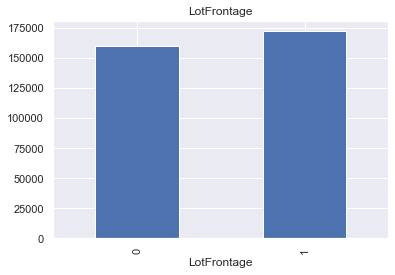

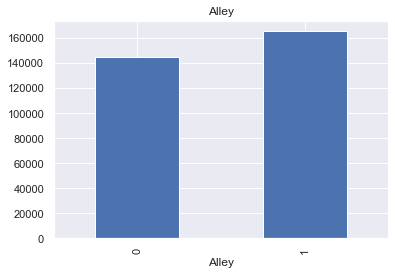

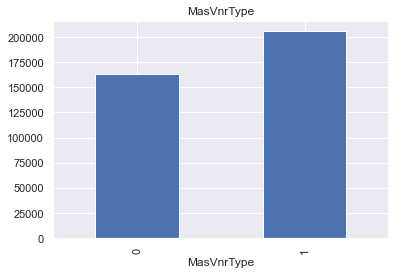

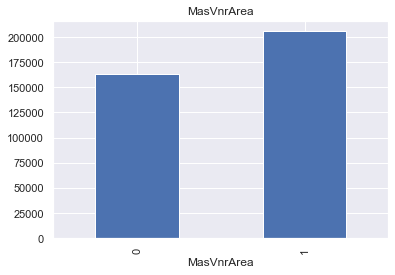

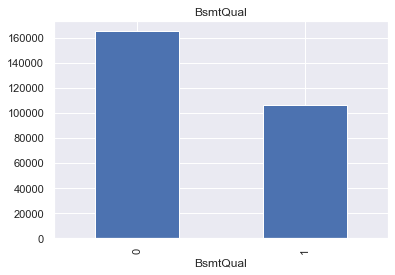

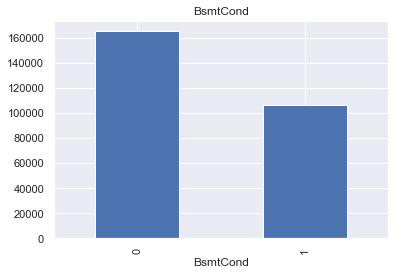

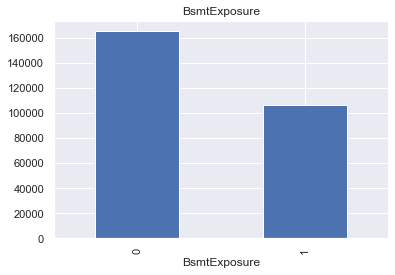

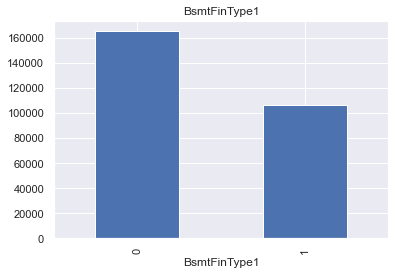

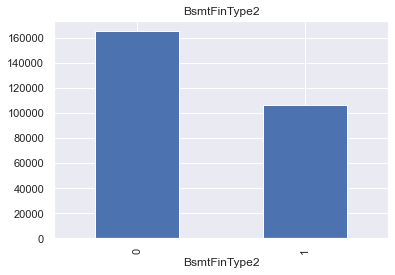

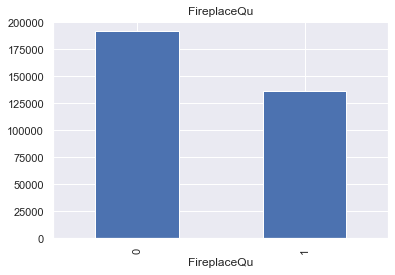

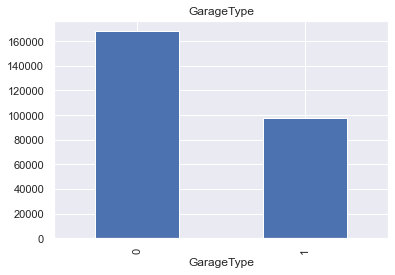

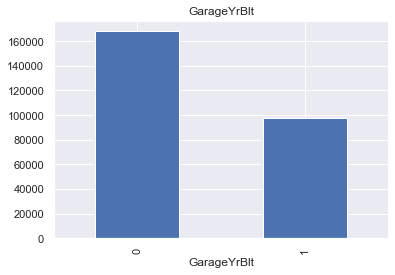

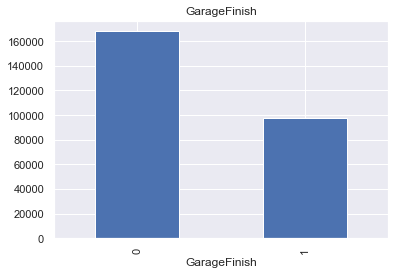

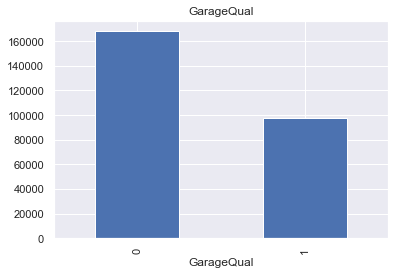

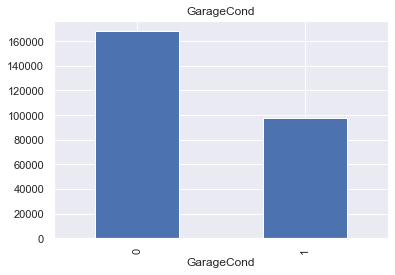

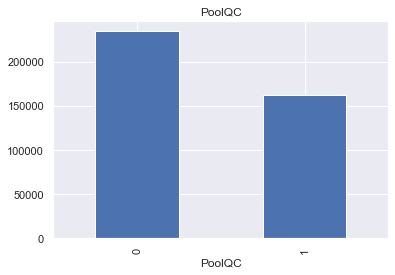

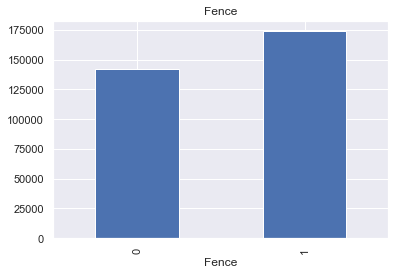

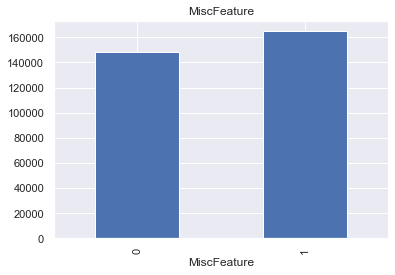

In [10]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

* We need to replace these nan values with something meaningful, Beacuase here With  the relation between the missing values and the dependent variable is clearly visible

### Numerical Data from the dataset

In [11]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,0,6,2009,215000


In [12]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, df[feature].unique())

YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987. 200

Text(0.5, 1.0, 'House Price vs YearSold')

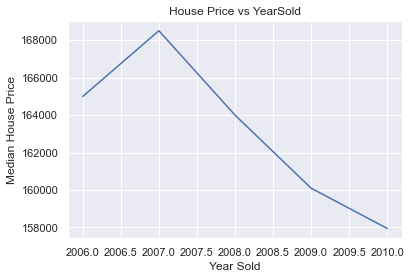

In [14]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

#### Observation: We can see that the sales price of house has been decreasing as the years go from 2006-2010 there is a significant drop in salesprice

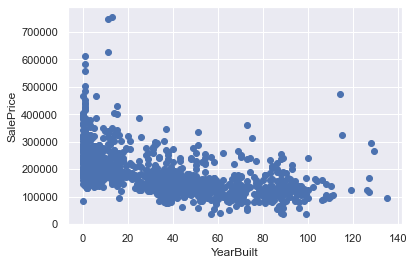

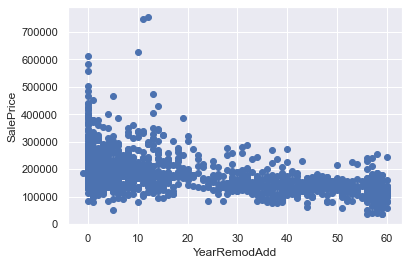

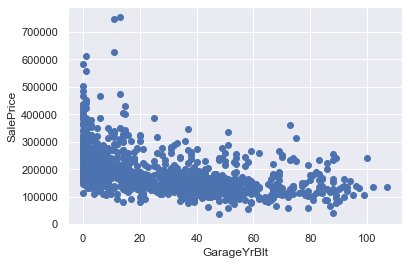

In [15]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

#### Observation: We can see that the sales price of house has significant effect if the year of built or year of remodeling or garage built year is all recent and less pricing for lately built houses

In [16]:
## There are 2 types of Numerical variables.

## 1. Discrete Variables
## 2. Continous variables

## 1. Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


#### Observation: There are about 17 Discrete Variables in the Data set  let's list them below 

In [17]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [18]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


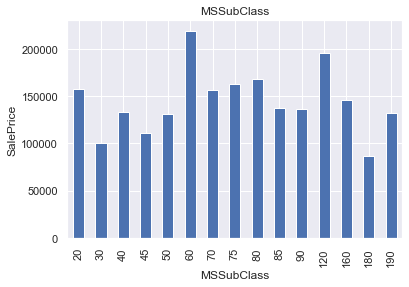

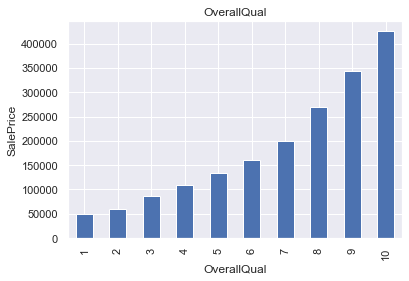

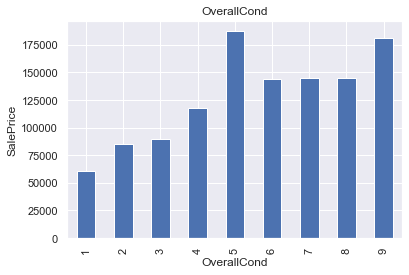

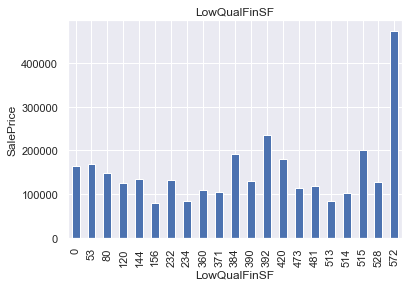

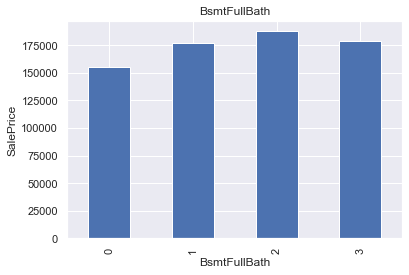

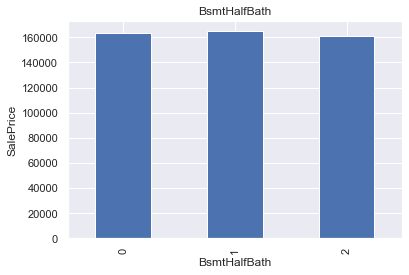

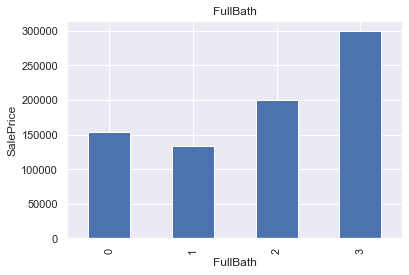

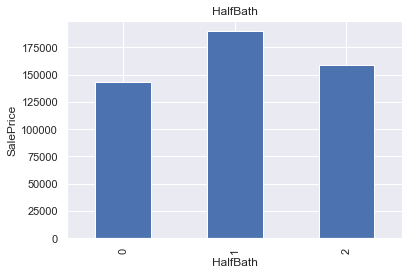

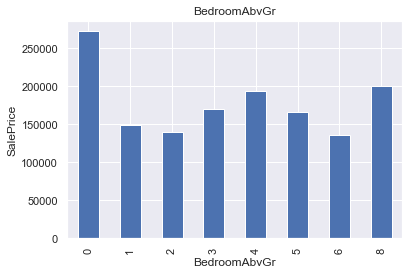

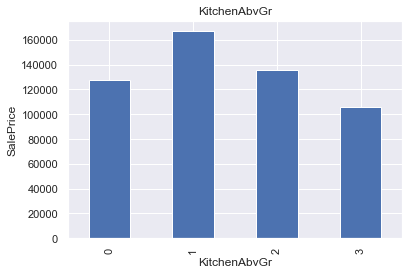

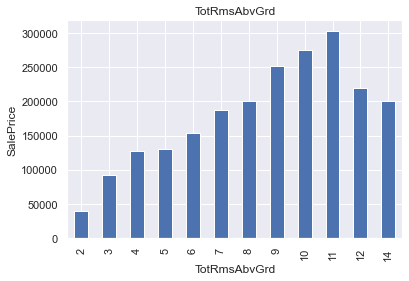

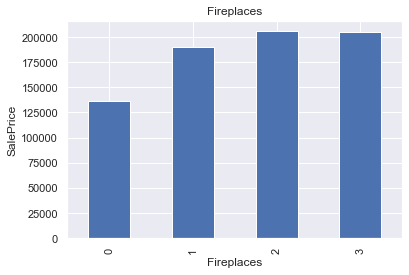

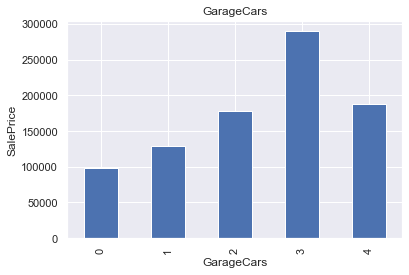

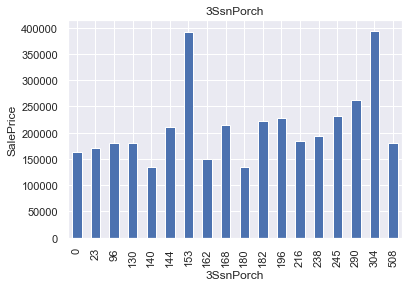

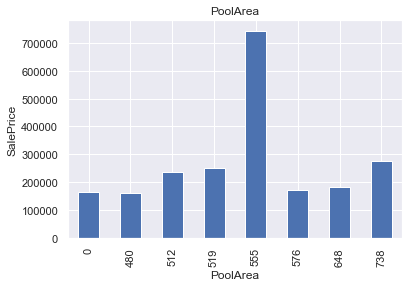

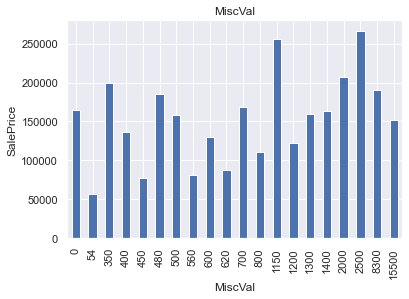

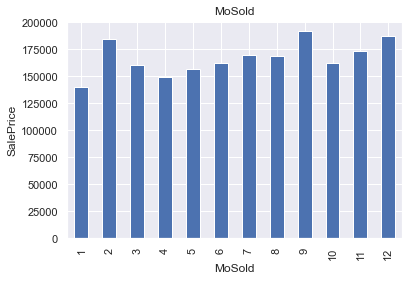

In [19]:
## Comparing the Discrete values with salesprice for analyzing purpose how its related with respect to salesprice

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### Observation: We can see that these features are related with salesprice as an example we can see OverallQuality of the house is proprtional to salesprice as the quality increases the salesprice rises aswell.

In [20]:
## 2. Continous variables

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


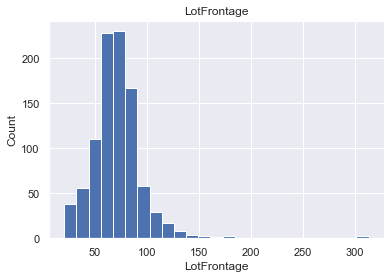

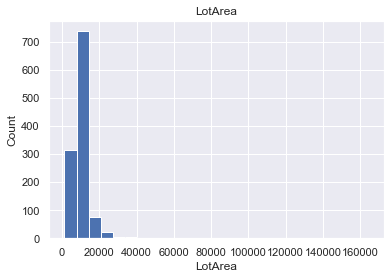

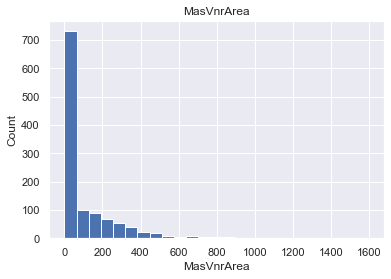

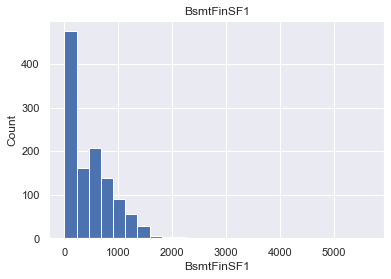

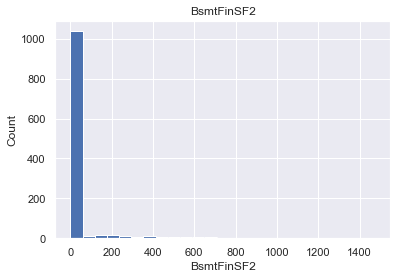

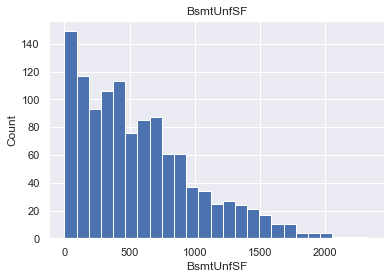

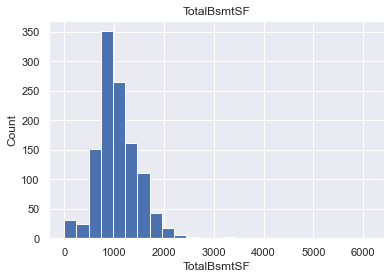

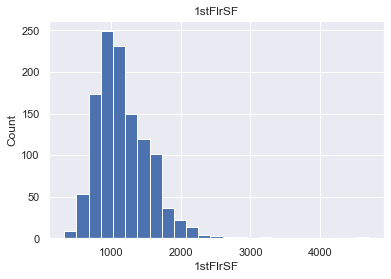

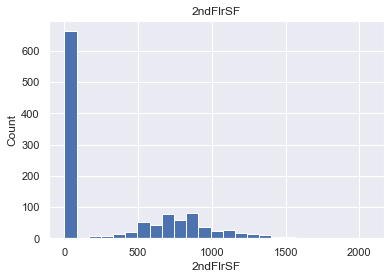

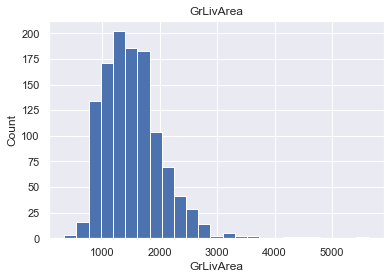

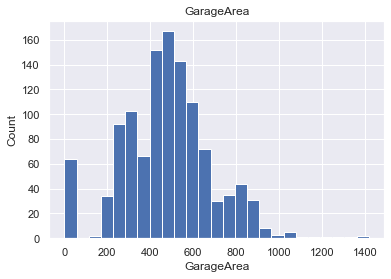

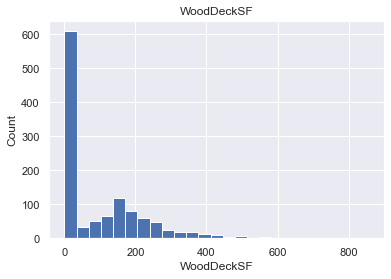

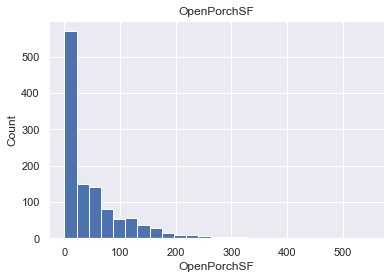

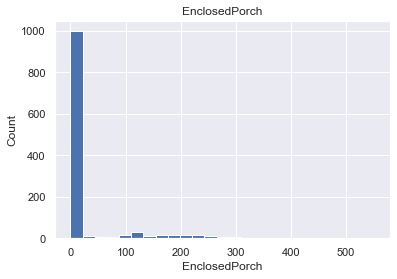

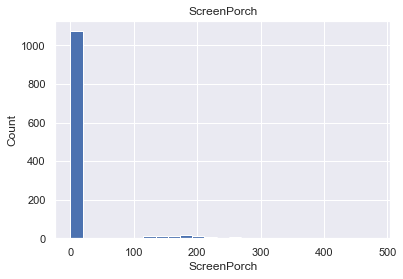

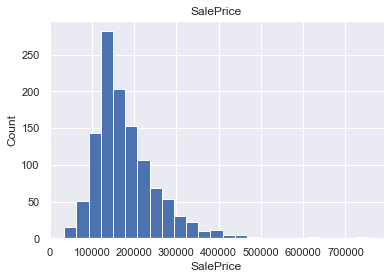

In [21]:
## Creating histograms to understand the distribution of these continous features

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Observation: We can only see few features that are Normally distributed the rest need to be transformed so that they are distributed normally aswell.

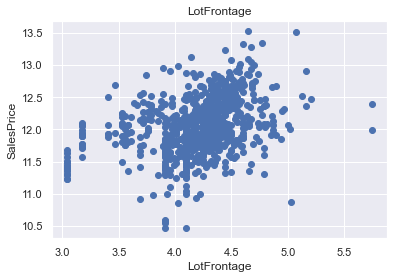

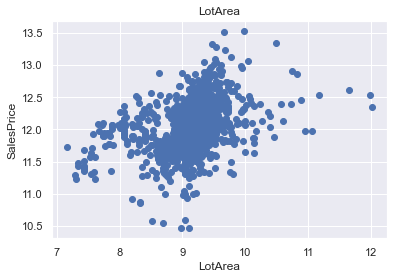

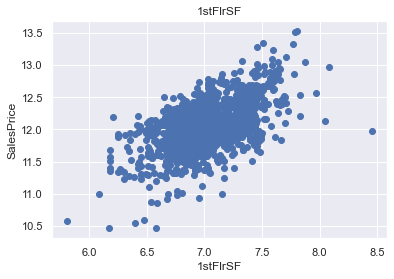

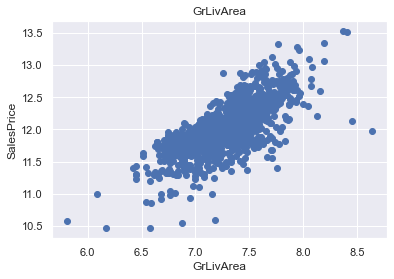

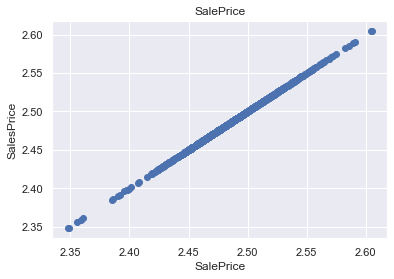

In [22]:
## Now et us apply log transformation on continous features


for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        
    

#### Observation: Now we can see almost all the features are Normally distributed as seen in above plots

### Now let us focus on Dealing with the Outliers as they are responsible for skewness in data in continous features

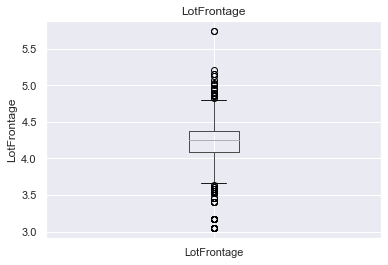

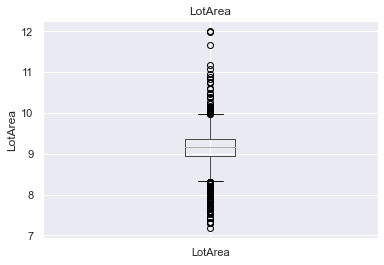

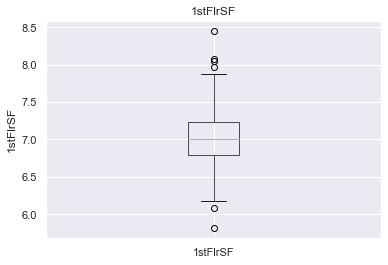

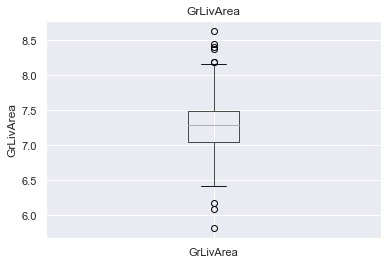

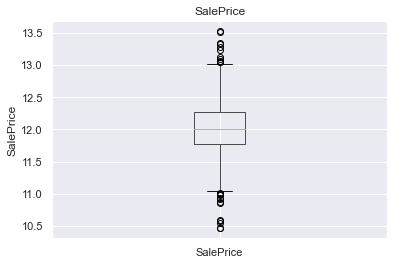

In [23]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#### Observation: From the above plots we are able to see a lot of outliers present in the continous features

### Categorical Data from the dataset

In [24]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
print("Continuous feature Count {}".format(len(categorical_features)))
categorical_features

Continuous feature Count 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Please refer the Feature Comments(Row #4) to understand the values aswell as feature names and their meanings

In [26]:
# Finding Categories and thier Counts for each categorical features.

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 1
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 15
The feature is MasVnrType and number of cate

In [27]:
#### Observation: 

#### Observation: Neighborhood has maximum categories and Utilities has the least

In [28]:
## Finding out the relationship between categorical variable and dependent feature SalesPrice

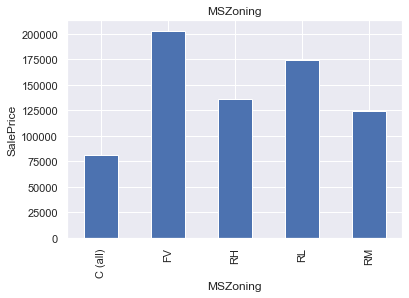

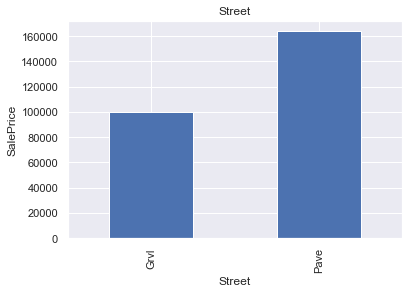

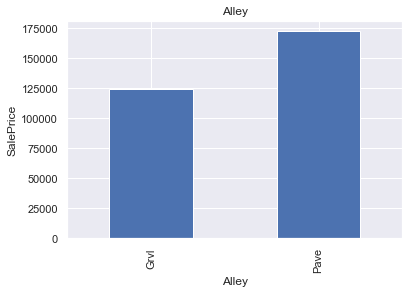

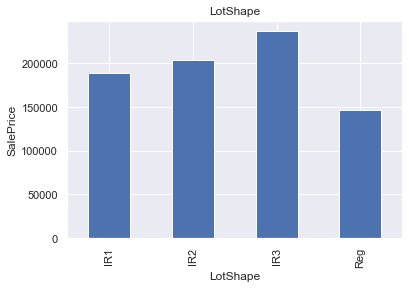

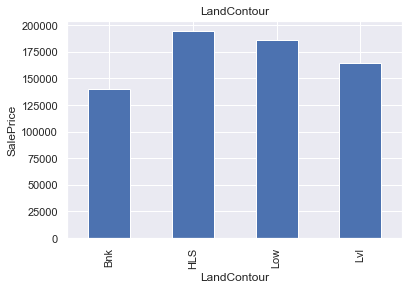

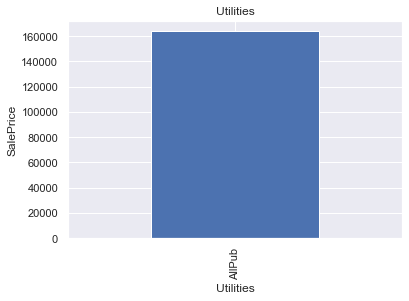

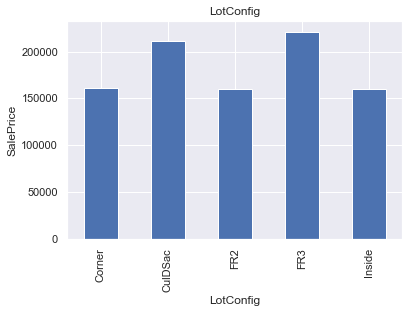

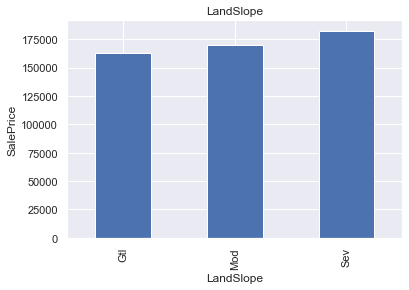

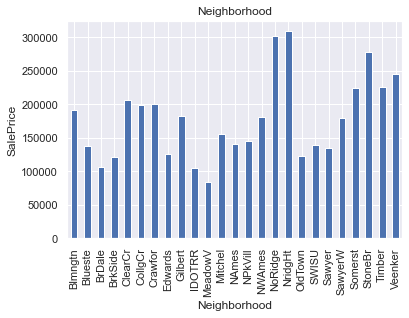

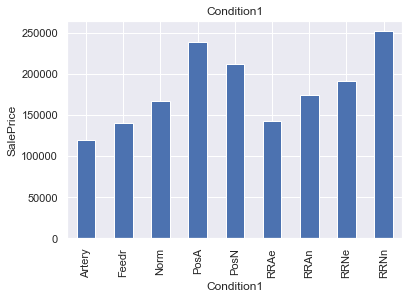

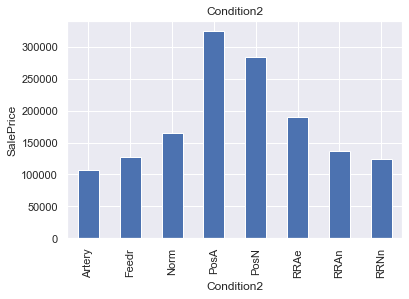

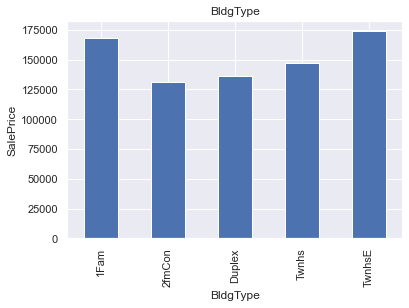

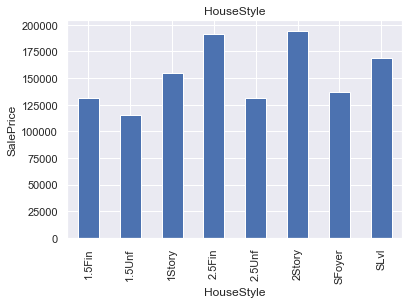

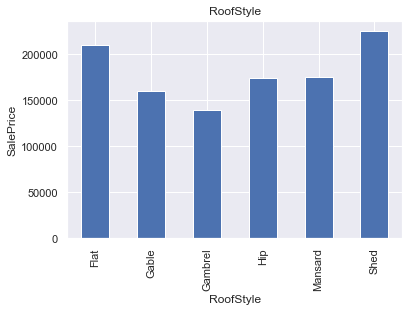

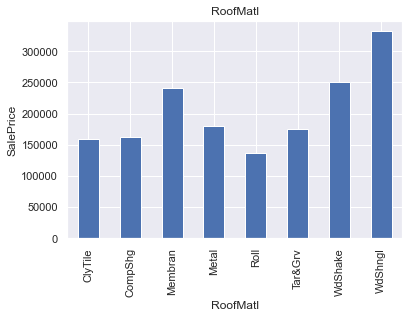

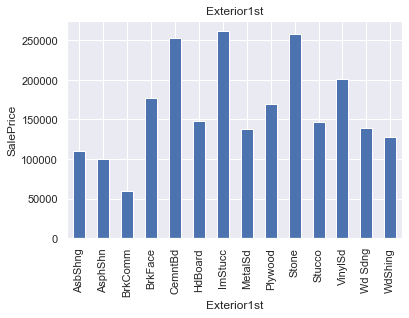

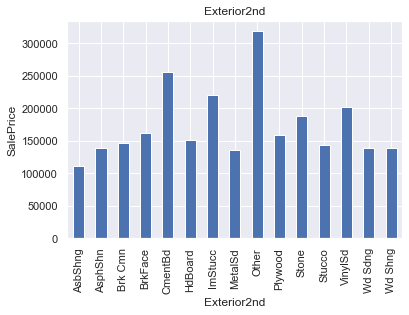

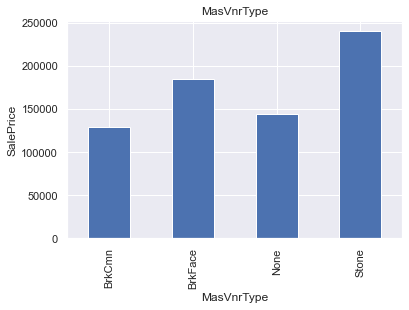

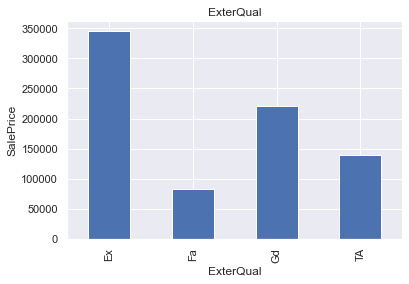

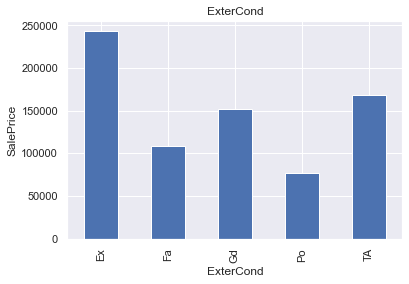

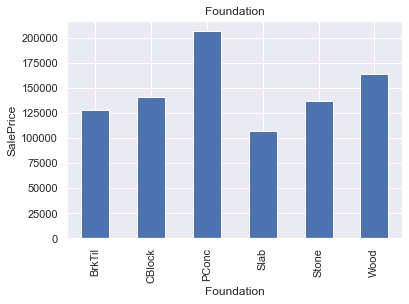

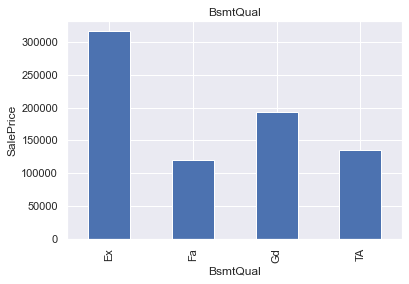

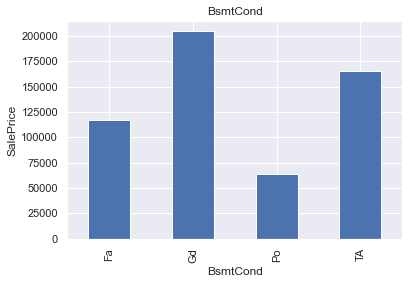

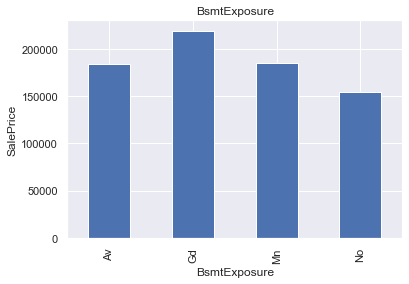

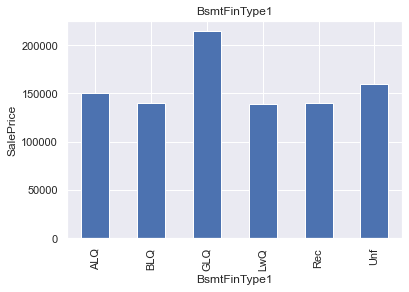

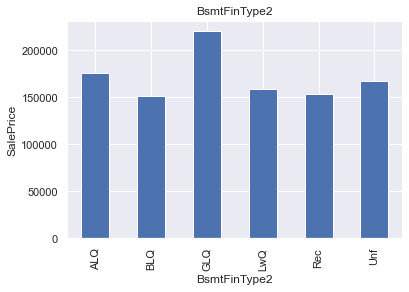

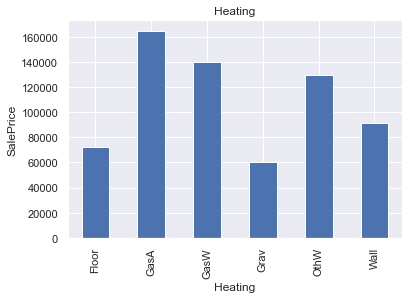

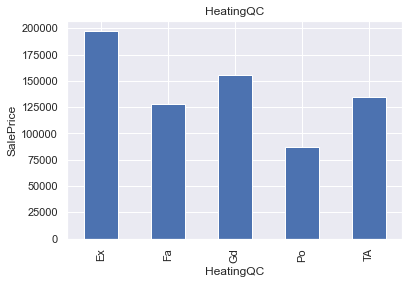

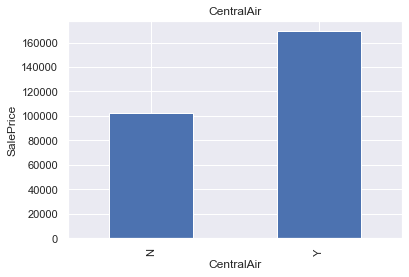

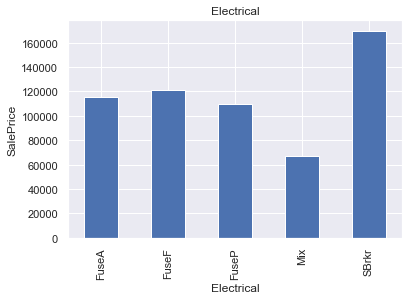

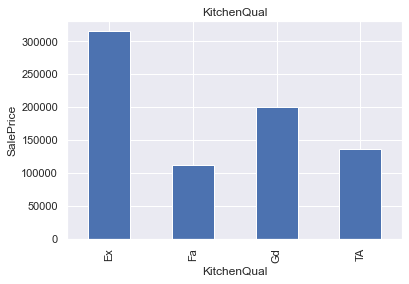

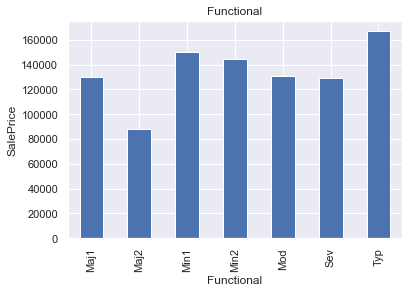

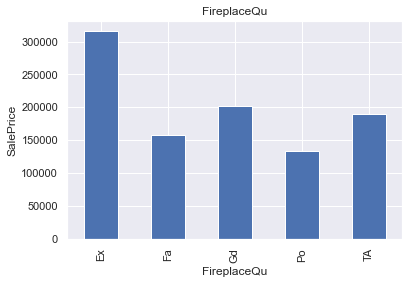

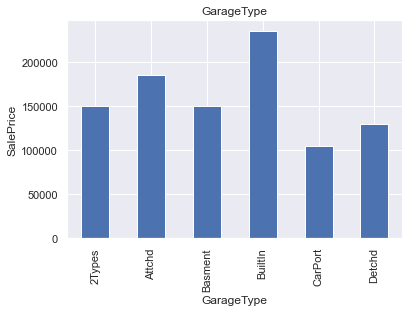

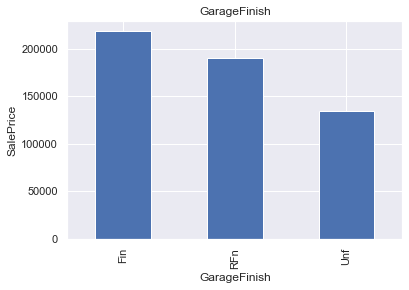

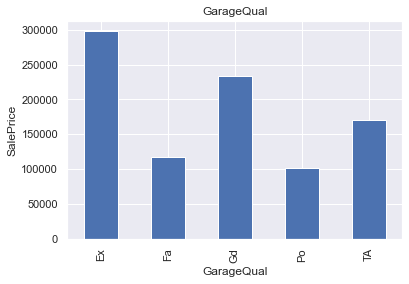

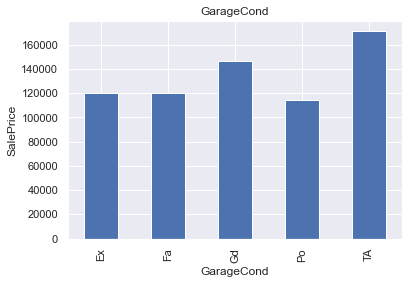

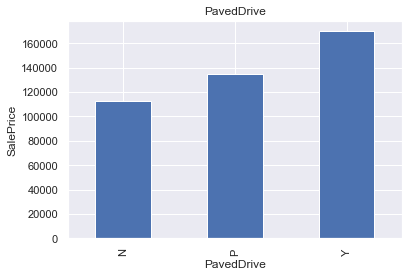

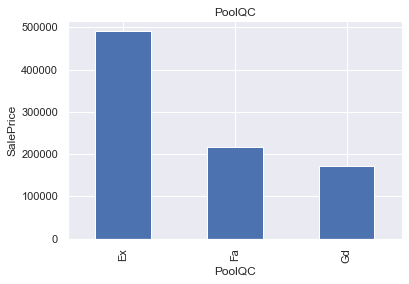

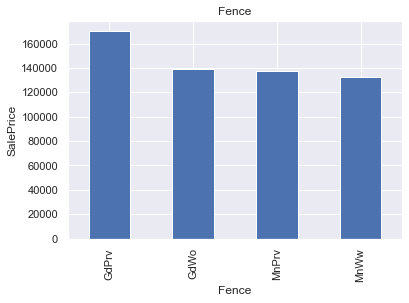

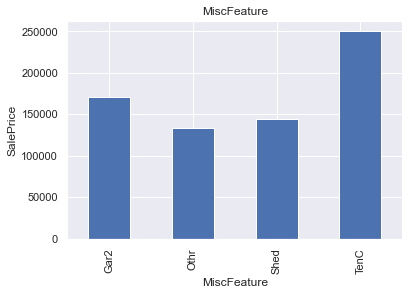

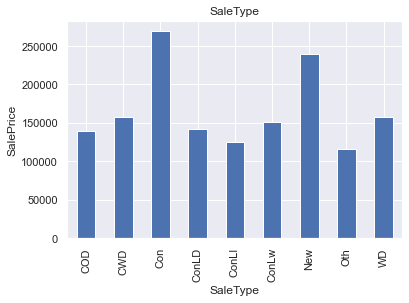

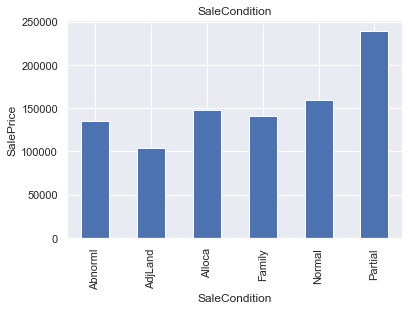

In [29]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [30]:
 ## Applying feature Engineering

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['SalePrice'],test_size=0.1,random_state=0)

In [31]:
X_train.shape, X_test.shape

((1051, 81), (117, 81))

In [32]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Alley: 0.9341% missing values
MasVnrType: 0.006% missing values
BsmtQual: 0.0257% missing values
BsmtCond: 0.0257% missing values
BsmtExposure: 0.0265% missing values
BsmtFinType1: 0.0257% missing values
BsmtFinType2: 0.0265% missing values
FireplaceQu: 0.4717% missing values
GarageType: 0.0548% missing values
GarageFinish: 0.0548% missing values
GarageQual: 0.0548% missing values
GarageCond: 0.0548% missing values
PoolQC: 0.994% missing values
Fence: 0.7971% missing values
MiscFeature: 0.9623% missing values


In [33]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,MnPrv,Missing,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,6,2009,WD,Normal,215000


In [35]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

LotFrontage: 0.1832% missing value
MasVnrArea: 0.006% missing value
GarageYrBlt: 0.0548% missing value


In [36]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()
    
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [37]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,120,RL,70.0,4928,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2007,WD,Normal,128000,1,0,0
1,889,20,RL,95.0,15865,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,10,2007,WD,Normal,268000,0,0,0
2,793,60,RL,92.0,9920,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,6,2007,WD,Normal,269790,0,0,0
3,110,20,RL,105.0,11751,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,1,2010,COD,Normal,190000,0,0,0
4,422,20,RL,70.0,16635,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,6,2009,WD,Normal,215000,1,0,0


In [38]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

In [39]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,31,31,30.0
1,37,37,37.0
2,11,10,10.0
3,33,33,33.0
4,32,9,32.0


### Performing Log Transformation on Numerical data

In [40]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df[feature]=np.log(df[feature])

In [41]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,120,RL,4.248495,8.502689,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2007,WD,Normal,11.759786,1,0,0
1,889,20,RL,4.553877,9.671871,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,10,2007,WD,Normal,12.498742,0,0,0
2,793,60,RL,4.521789,9.202308,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,6,2007,WD,Normal,12.505399,0,0,0
3,110,20,RL,4.653960,9.371694,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,1,2010,COD,Normal,12.154779,0,0,0
4,422,20,RL,4.248495,9.719264,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,6,2009,WD,Normal,12.278393,1,0,0


#### Removing categorical variables that are present less than 1% of the observations

In [42]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [43]:
for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,120,RL,4.248495,8.502689,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2007,WD,Normal,11.759786,1,0,0
1,889,20,RL,4.553877,9.671871,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,10,2007,WD,Normal,12.498742,0,0,0
2,793,60,RL,4.521789,9.202308,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,6,2007,WD,Normal,12.505399,0,0,0
3,110,20,RL,4.653960,9.371694,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,1,2010,COD,Normal,12.154779,0,0,0
4,422,20,RL,4.248495,9.719264,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,6,2009,WD,Normal,12.278393,1,0,0
5,1197,60,RL,4.060443,9.550662,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,11,2006,New,Partial,12.297785,0,0,0
6,561,20,RL,4.248495,9.336180,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,5,2010,WD,Normal,11.707670,1,0,0
7,1041,20,RL,4.477337,9.482274,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,1,2006,WD,Normal,11.951180,0,0,0
8,503,20,RL,4.248495,9.123693,Pave,Missing,Reg,Lvl,AllPub,...,Shed,400,4,2007,WD,Normal,11.849398,0,0,0
9,576,50,RL,4.382027,9.045466,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,10,2008,COD,Abnorml,11.682668,0,0,0


In [44]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,120,3,4.248495,8.502689,1,2,1,1,0,...,1,0,2,2007,2,4,11.759786,1,0,0
1,889,20,3,4.553877,9.671871,1,2,1,1,0,...,1,0,10,2007,2,4,12.498742,0,0,0
2,793,60,3,4.521789,9.202308,1,2,1,1,0,...,1,0,6,2007,2,4,12.505399,0,0,0
3,110,20,3,4.653960,9.371694,1,2,1,1,0,...,1,0,1,2010,0,4,12.154779,0,0,0
4,422,20,3,4.248495,9.719264,1,2,1,1,0,...,1,0,6,2009,2,4,12.278393,1,0,0
5,1197,60,3,4.060443,9.550662,1,2,1,1,0,...,1,0,11,2006,3,5,12.297785,0,0,0
6,561,20,3,4.248495,9.336180,1,2,1,1,0,...,1,0,5,2010,2,4,11.707670,1,0,0
7,1041,20,3,4.477337,9.482274,1,2,0,1,0,...,1,0,1,2006,2,4,11.951180,0,0,0
8,503,20,3,4.248495,9.123693,1,2,0,1,0,...,0,400,4,2007,2,4,11.849398,0,0,0
9,576,50,3,4.382027,9.045466,1,2,0,1,0,...,1,0,10,2008,0,1,11.682668,0,0,0


In [45]:
scaling_feature=[feature for feature in df.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [46]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,120,3,4.248495,8.502689,1,2,1,1,0,...,1,0,2,2007,2,4,11.759786,1,0,0
1,889,20,3,4.553877,9.671871,1,2,1,1,0,...,1,0,10,2007,2,4,12.498742,0,0,0
2,793,60,3,4.521789,9.202308,1,2,1,1,0,...,1,0,6,2007,2,4,12.505399,0,0,0
3,110,20,3,4.653960,9.371694,1,2,1,1,0,...,1,0,1,2010,0,4,12.154779,0,0,0
4,422,20,3,4.248495,9.719264,1,2,1,1,0,...,1,0,6,2009,2,4,12.278393,1,0,0
5,1197,60,3,4.060443,9.550662,1,2,1,1,0,...,1,0,11,2006,3,5,12.297785,0,0,0
6,561,20,3,4.248495,9.336180,1,2,1,1,0,...,1,0,5,2010,2,4,11.707670,1,0,0
7,1041,20,3,4.477337,9.482274,1,2,0,1,0,...,1,0,1,2006,2,4,11.951180,0,0,0
8,503,20,3,4.248495,9.123693,1,2,0,1,0,...,0,400,4,2007,2,4,11.849398,0,0,0
9,576,50,3,4.382027,9.045466,1,2,0,1,0,...,1,0,10,2008,0,1,11.682668,0,0,0


### Feature Scaling

In [47]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [48]:
scaler.transform(df[feature_scale])

array([[0.58823529, 0.75      , 0.44563844, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.55867239, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.54679523, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.82352941, 0.75      , 0.0494253 , ..., 0.        , 0.        ,
        0.        ],
       [0.29411765, 0.        , 0.32109662, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.44563844, ..., 1.        , 0.        ,
        0.        ]])

In [49]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [50]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,127,11.759786,0.588235,0.75,0.445638,0.275238,1.0,1.0,0.333333,0.333333,...,0.75,0.5,0.0,0.090909,0.25,0.666667,0.8,1.0,0.0,0.0
1,889,12.498742,0.000000,0.75,0.558672,0.516729,1.0,1.0,0.333333,0.333333,...,0.75,0.5,0.0,0.818182,0.25,0.666667,0.8,0.0,0.0,0.0
2,793,12.505399,0.235294,0.75,0.546795,0.419742,1.0,1.0,0.333333,0.333333,...,0.75,0.5,0.0,0.454545,0.25,0.666667,0.8,0.0,0.0,0.0
3,110,12.154779,0.000000,0.75,0.595717,0.454728,1.0,1.0,0.333333,0.333333,...,0.50,0.5,0.0,0.000000,1.00,0.000000,0.8,0.0,0.0,0.0
4,422,12.278393,0.000000,0.75,0.445638,0.526518,1.0,1.0,0.333333,0.333333,...,0.75,0.5,0.0,0.454545,0.75,0.666667,0.8,1.0,0.0,0.0


In [51]:
## Capturing the dependent feature
y_train=df[['SalePrice']]

In [52]:
## drop dependent feature from dataset
X_train=df.drop(['Id','SalePrice'],axis=1)

In [53]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [54]:
feature_sel_model.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True, False,  True, False, False,
       False])

In [55]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 43
features with coefficients shrank to zero: 38


In [56]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'YrSold', 'SaleCondition'],
      dtype='object')

In [57]:
X_train=X_train[selected_feat]

In [58]:
X_train.head()

,MSSubClass,MSZoning,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,YrSold,SaleCondition
0,120,3,8.502689,1,4,3,6,5,31,31,...,440,0,205,0,0,0,0,3,2007,4
1,20,3,9.671871,1,7,3,8,6,37,37,...,621,81,207,0,0,224,0,3,2007,4
2,60,3,9.202308,4,20,6,7,5,11,10,...,455,180,130,0,0,0,0,3,2007,4
3,20,3,9.371694,1,10,3,6,6,33,33,...,546,0,122,0,0,0,0,2,2010,4
4,20,3,9.719264,0,10,3,6,7,32,9,...,529,240,0,0,0,0,0,3,2009,4


In [59]:
#Checking value count of MSZoning feature
df['MSZoning'].value_counts()

3    928
1    163
4     52
2     16
0      9
Name: MSZoning, dtype: int64

<AxesSubplot:>

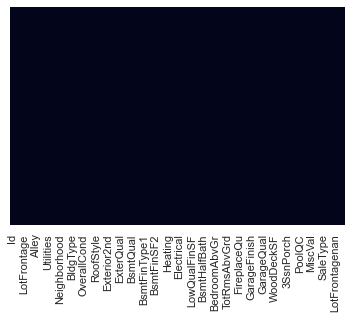

In [60]:
sn.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [61]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [62]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [63]:
df.drop(['Alley'],axis=1,inplace=True)

In [64]:
df.drop(['Id'],axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1168 non-null   int64  
 1   MSZoning        1168 non-null   int64  
 2   LotFrontage     1168 non-null   float64
 3   LotArea         1168 non-null   float64
 4   Street          1168 non-null   int64  
 5   LotShape        1168 non-null   int64  
 6   LandContour     1168 non-null   int64  
 7   Utilities       1168 non-null   int64  
 8   LotConfig       1168 non-null   int64  
 9   LandSlope       1168 non-null   int64  
 10  Neighborhood    1168 non-null   int64  
 11  Condition1      1168 non-null   int64  
 12  Condition2      1168 non-null   int64  
 13  BldgType        1168 non-null   int64  
 14  HouseStyle      1168 non-null   int64  
 15  OverallQual     1168 non-null   int64  
 16  OverallCond     1168 non-null   int64  
 17  YearBuilt       1168 non-null   i

In [66]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [67]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [68]:
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
                 ..
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0


In [69]:
df.dropna(inplace=True)

In [70]:
df['LotFrontagenan'] = df['LotFrontagenan'].astype(np.int64)
df['MasVnrAreanan'] = df['MasVnrAreanan'].astype(np.int64)
df['GarageYrBltnan'] = df['GarageYrBltnan'].astype(np.int64)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 0 to 1167
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSSubClass      1168 non-null   int64  
 1   MSZoning        1168 non-null   int64  
 2   LotFrontage     1168 non-null   float64
 3   LotArea         1168 non-null   float64
 4   Street          1168 non-null   int64  
 5   LotShape        1168 non-null   int64  
 6   LandContour     1168 non-null   int64  
 7   Utilities       1168 non-null   int64  
 8   LotConfig       1168 non-null   int64  
 9   LandSlope       1168 non-null   int64  
 10  Neighborhood    1168 non-null   int64  
 11  Condition1      1168 non-null   int64  
 12  Condition2      1168 non-null   int64  
 13  BldgType        1168 non-null   int64  
 14  HouseStyle      1168 non-null   int64  
 15  OverallQual     1168 non-null   int64  
 16  OverallCond     1168 non-null   int64  
 17  YearBuilt       1168 non-null   i

In [72]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [73]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [74]:
main_df=df.copy()

In [75]:
## Combine Test Data 
test_df=pd.read_csv('test.csv')

In [76]:
test_df.shape

(292, 80)

In [77]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [78]:
final_df=pd.concat([df,test_df],axis=0)

In [79]:
final_df['SalePrice']

0      11.759786
1      12.498742
2      12.505399
3      12.154779
4      12.278393
5      12.297785
6      11.707670
7      11.951180
8      11.849398
9      11.682668
10     11.691072
11     12.375815
12     12.211060
13     11.747998
14     11.816727
15     12.013701
16     11.699405
17     12.178187
18     11.904968
19     11.571194
20     12.352335
21     11.798104
22     11.864462
23     11.824080
24     11.891362
25     12.287653
26     11.626254
27     12.885202
28     11.635143
29     12.147914
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
267          NaN
268          NaN
269          NaN
270          NaN
271          NaN
272          NaN
273          NaN
274          NaN
275          NaN
276          NaN
277          NaN
278          NaN
279          NaN
280          NaN
281          NaN
282          NaN
283          NaN
284          NaN
285          NaN
286          NaN
287          NaN
288          NaN
289          N

In [80]:
final_df.shape

(1460, 84)

In [81]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [82]:
final_df.shape

(1460, 84)

In [83]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [84]:
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,Id,Alley,GarageYrBlt,PoolQC,Fence,MiscFeature
0,120,3,4.248495,8.502689,1,1,1,0,1,1,...,11.759786,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20,3,4.553877,9.671871,1,1,1,0,1,0,...,12.498742,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,60,3,4.521789,9.202308,1,1,1,0,4,1,...,12.505399,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20,3,4.653960,9.371694,1,1,1,0,1,1,...,12.154779,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,20,3,4.248495,9.719264,1,1,1,0,0,1,...,12.278393,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df_Train.shape

(1460, 84)

In [86]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [102]:
X_train=df.drop(['SalePrice'],axis=1)
y_train=df['SalePrice']


In [104]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.20,random_state=123)

In [105]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    training_start = time.perf_counter()
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    training_end = time.perf_counter()
    prediction_start = time.perf_counter()
    print("Training score: {}".format(model.score(X_train,y_train)*100))
    predictions = model.predict(X_test)
    prediction_end = time.perf_counter()
    print("Predictions are: {}".format(predictions))
    print('\n')
    model_train_time = training_end-training_start
    model_prediction_time = prediction_end-prediction_start
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score*100))
    
    print("Time consumed for training: %4.3f" % (model_train_time))
    print("Time consumed for prediction: %6.5f seconds" % (model_prediction_time))     
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sn.distplot(y_test-predictions) 

In [106]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 98.11047951434931
Predictions are: [11.78037364 12.31926293 11.89596734 12.17714805 11.72274253 11.80147713
 11.91898567 11.55219496 11.50114635 11.63396718 11.61169824 12.57427727
 12.31064132 12.14099662 12.09736221 12.31603787 11.79460313 11.96743327
 12.17276339 12.67482235 11.555509   11.78830255 12.36322687 11.52296669
 12.20261503 11.76745947 11.80894681 11.6756971  11.91020372 11.85281704
 12.1521016  11.93740368 12.11204021 12.43525956 11.8688411  12.50904399
 11.9099049  12.19357259 12.64646517 12.35608256 12.7254203  11.99451567
 12.54815482 12.62533532 12.39254238 12.53429962 12.68336168 11.82714963
 11.89035073 11.72856359 13.11858794 12.58849669 11.73918204 11.91184687
 11.58948171 12.20189815 12.126167   11.8480414  11.60875863 11.7920192
 11.79694279 11.73760436 12.15965863 12.43441233 11.85156636 12.01066375
 11.60790863 11.73258654 12.31367583 11.91053883 12.08940938 12.07748847
 11.48186067 12.47528629 12.1454455  11.

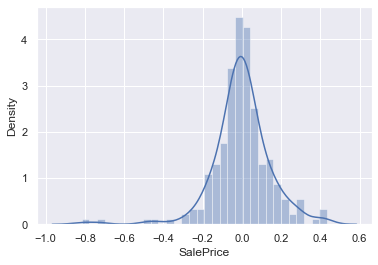

In [107]:
# Predict Flight fare using RandomForestRegressor
rf=RandomForestRegressor()
predict(rf)

Model is: KNeighborsRegressor()
Training score: 80.18387867170296
Predictions are: [11.76879888 12.35108646 11.70718935 12.15113794 11.78986136 11.8221105
 11.95947494 11.5367698  11.66040258 11.66153787 11.50240737 12.36668939
 12.30492794 12.06457303 12.18929061 12.23053544 11.79604106 12.16833345
 11.85566511 12.47300939 11.76463646 12.04596324 12.34059311 11.61703527
 12.21711349 11.56966027 11.81716058 11.59221712 12.45218438 11.85127665
 12.31660998 11.97756822 12.19398933 12.32961161 11.86512038 12.37644252
 12.36718586 12.03965802 12.47267556 12.0859585  12.78077567 12.06434292
 12.25881502 12.6350489  12.36546795 12.36350147 12.58883193 11.89925536
 11.87290628 11.79638183 12.69456533 12.5419323  11.94524985 11.6766388
 11.66436203 12.18583291 12.11993841 11.82437963 11.15451952 11.92260239
 11.91898715 11.91452902 12.1113893  12.5345161  11.68544633 11.84113315
 11.5719859  11.70852921 12.3957864  11.92198062 12.01694397 11.94125551
 11.56966027 12.36037948 11.96687912 12.033

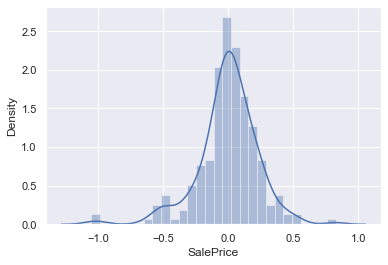

In [109]:
# Predict Flight fare using
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 100.0
Predictions are: [11.76756768 12.36734079 11.91505167 12.22096126 11.75978554 11.72803684
 11.94145585 11.81672692 11.58058411 11.68687877 11.69316152 12.58819065
 12.23076526 12.229545   12.02873863 12.35978037 11.79810441 12.07823927
 12.17044547 12.66999847 11.31447453 11.73206099 12.33138284 11.51292546
 12.27839331 11.68568478 11.65268741 11.81228904 12.01672647 11.81303006
 12.07254125 11.90090526 12.1281111  12.32385568 12.05233855 12.66032792
 11.84222921 12.14419724 12.72188581 12.29910751 12.82098798 11.94145585
 12.66191396 12.66665705 12.32829028 12.75995776 13.53447303 11.90496755
 11.95697006 11.73206099 12.66032792 12.69158046 11.58058411 12.1281111
 11.48760766 12.19095901 12.06104687 11.9316358  11.6784399  11.49882654
 12.01370075 11.58058411 12.11176197 12.45683136 11.88448902 11.84510278
 11.58988651 11.80185676 12.23027733 11.8313792  11.76756768 11.84510278
 11.43927892 12.43320822 12.07539432 11.87756858 12.

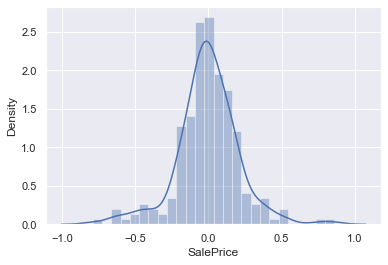

In [110]:
# Predict Flight fare using
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 78.34004125669861
Predictions are: [11.73136435 12.29917022 11.99887543 12.10937735 11.84738694 12.00253777
 11.92038988 11.52171402 11.69753534 11.57755487 11.62928255 12.46254192
 12.2828539  12.17068769 12.07257316 12.23658813 11.76941753 12.07754858
 11.81953504 12.55023218 11.79814587 11.96092515 12.40658659 11.68698266
 12.2058232  11.48719827 11.7888284  11.65216266 12.35871955 11.86944299
 12.26866795 11.92051783 12.14880232 12.44864804 11.96510962 12.29696018
 12.32417272 12.11783575 12.46256703 12.23512709 12.78511305 12.01832038
 12.44449027 12.54504583 12.42010675 12.48727745 12.63816587 11.70395299
 11.80592705 11.74065475 12.79594226 12.59523217 11.99104087 11.94580387
 11.63240832 12.12451973 12.1275624  11.83357373 11.28716709 11.79561531
 11.89529906 11.98192643 12.10595242 12.39026351 11.77367223 11.70915468
 11.76982085 11.63742452 12.40903557 11.90938122 12.08160729 11.93406602
 11.45296372 12.30969883 12.00774273 11.85837953 12.12810

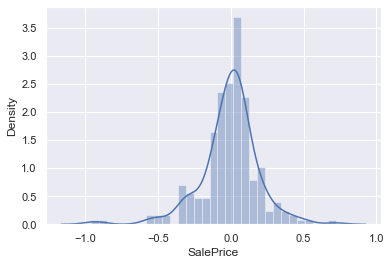

In [111]:
# Predict Flight fare using
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 96.54156486905924
Predictions are: [11.72004827 12.32889428 11.88469436 12.2136021  11.75449437 11.84732419
 11.9652005  11.47203797 11.39077329 11.55774596 11.6419403  12.55560031
 12.2924712  12.12463078 12.02885475 12.26906868 11.81120932 12.07937059
 12.23013809 12.69323757 11.4856382  11.72798925 12.35702422 11.47022439
 12.18567385 11.71272927 11.7659317  11.75840783 11.9350606  11.75012489
 12.31559933 11.95273176 12.16793824 12.52535333 11.89958944 12.71296351
 12.02390709 12.26520165 12.66917773 12.42919656 12.69898426 12.04074629
 12.47004859 12.57094773 12.36434423 12.57708286 12.70338261 11.86228154
 11.92990655 11.7502362  13.15468569 12.67733838 11.70990614 11.94522279
 11.58836303 12.1638799  12.09341464 11.89420215 11.50028989 11.73863506
 11.76110471 11.75329735 12.17280715 12.50664144 11.86975435 11.82083137
 11.58925977 11.73811811 12.33211877 11.91696389 12.10282152 12.14892805
 11.40496727 12.52610509 12.0978915

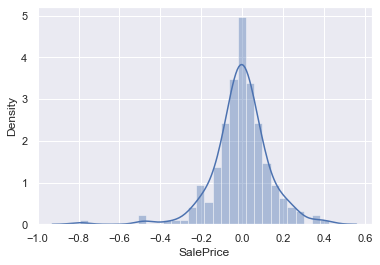

In [112]:
# Predict Flight fare using
predict(GradientBoostingRegressor())

### Hypertunning the model

###### In this grid search I will try different combinations of RF hyperparameters.

###### Most important hyperparameters of Random Forest:

###### n_estimators = n of trees
###### max_features = max number of features considered for splitting a node
###### max_depth = max number of levels in each decision tree
###### min_samples_split = min number of data points placed in a node before the node is split
###### min_samples_leaf = min number of data points allowed in a leaf node
###### bootstrap = method for sampling data points (with or without replacement)

#### Grid Search

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [114]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.16839420411324513 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.1527776397890535 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
0.15933801611881096 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.1485336438185757 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.15900597423604637 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.15123495110328752 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.15428039260177281 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.15033918936841775 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.16587685492069923 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.15595227726504335 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.15527252344528 {'bootstrap': Tru

In [115]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features=10,
                      n_estimators=25)

In [116]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 100.0 %


In [117]:
#RMSE
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 0.0


In [118]:
round(r2_score(y_train,grid_best)*100,2)

100.0

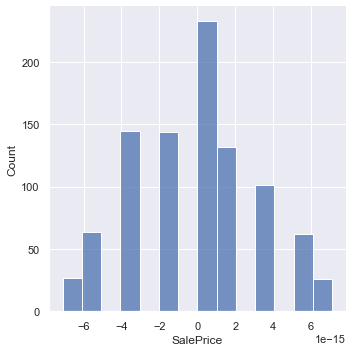

In [119]:
#distribution plot between actual value and predicted value
sn.displot(y_train-grid_best)

#### Randomized Search

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

In [121]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [122]:
pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [123]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [124]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

0.2851287362315106 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.28508152658105435 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.14921096735411382 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.15285396303104837 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.27454426211243155 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.14599084368148618 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.14563220916387368 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.1505523866636149 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.27497766937287194 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.14860653916740227 {'n_estimators': 110, '

In [125]:
# best random model 
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155)

In [126]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 23}

In [127]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=23, max_features='sqrt', min_samples_split=5,
                      n_estimators=155)

In [128]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(X_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 99.63 %


In [129]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 0.07


In [130]:
round(r2_score(y_train,random_best)*100,2)

97.0

#### After hypertuning,the accuracy increases

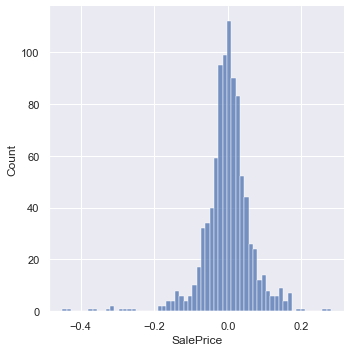

In [131]:
#distribution plot between actual value and predicted value
sn.displot(y_train-random_best)

#### Observation: We can see from the above plot that the predicted data is perfectly normally distributed

In conclusion, the metrics for our best models on the training set after our hyperparameter fine-tuning are the following:

Grid-search:
RMSE: 0.0
accuracy (MAPE): 100 %
r2 Score:100.0
Randomized Search:
RMSE: 0.07
accuracy: 99.63 %
r2 Score:97.0
    
This of course does not mean that the Randomized search is inherently inferior to  Grid-search.
Its just that in this notebook I used the information provided by the former to refine the latter.
In any case, this time I will consider the model obtained by the Grid search as the best one.
First I will plot the feature importance for this model. 
This will give me precious insight to the most important factor in predicting our dependent variable Price. 
Then I will apply the model to the test set.

##### Feature Importance

In [134]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X_train.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance         feature
0     0.100823     OverallQual
1     0.088005       GrLivArea
2     0.086088    Neighborhood
3     0.062831       YearBuilt
4     0.055818       ExterQual
5     0.045347        FullBath
6     0.037992     TotalBsmtSF
7     0.037619     KitchenQual
8     0.034932      GarageArea
9     0.033212        1stFlrSF
10    0.033007      GarageCars
11    0.024202      GarageType
12    0.023123      Foundation
13    0.022517    GarageFinish
14    0.022288        BsmtQual
15    0.022075    TotRmsAbvGrd
16    0.019913    YearRemodAdd
17    0.018488         LotArea
18    0.015921     FireplaceQu
19    0.015555      BsmtFinSF1
20    0.015380      Fireplaces
21    0.014671        2ndFlrSF
22    0.012316     LotFrontage
23    0.009891      MasVnrArea
24    0.009422     OpenPorchSF
25    0.009412    BsmtFinType1
26    0.008687     OverallCond
27    0.006378        MSZoning
28    0.006092      CentralAir
29    0.005888    BedroomAbvGr
..         ...             ...
47    0.

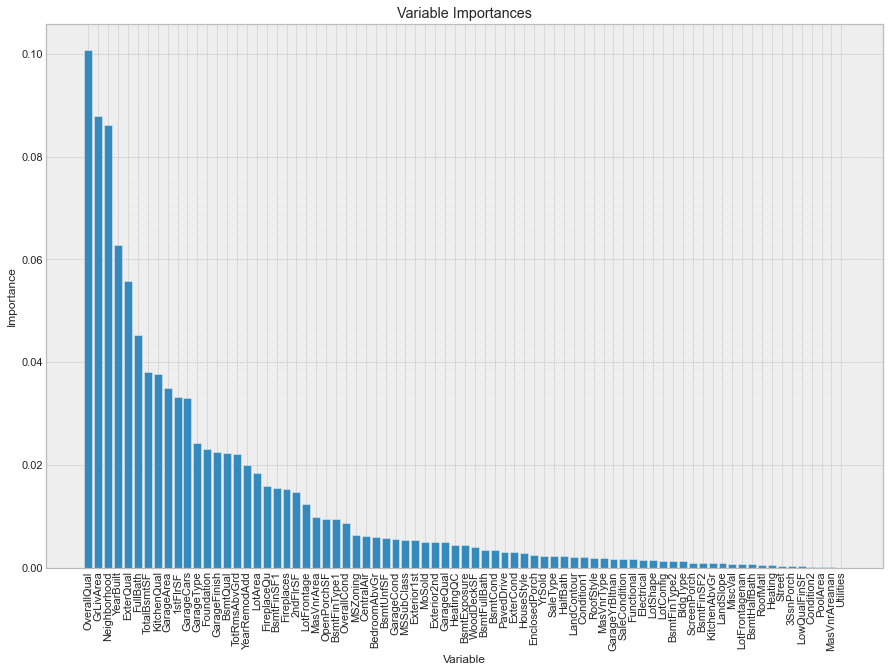

In [135]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

* Observation:A future aim may be to cut the less relevant features (lets say we can drop some columns in terms of importance), estimate a new model and compare it with the old ones.
* I reckon it would lose predictive power, but on the other hand it would improve in terms of training speed.

###### In conclusion, these are my final considerations on the model:

* The best feature to reliably predict the House price is Type of OverallQual. After OverallQual there is a group of 10 features including: 1     0.088005       GrLivArea
* 2  Neighborhood    0.086088    
* 3  YearBuilt  0.062831       
* 4  ExterQual   0.055818       
* 5  FullBath   0.045347        
* 6  TotalBsmtSF   0.037992     
* 7  KitchenQual   0.037619     
* 8  GarageArea   0.034932      
* 9  1stFlrSF   0.033212        
* 10 GarageCars   0.033007      
* 11 GarageType   0.024202      
* Utilities is the least relevant feature in this cluster.

#### Evaluate best model on the test set

In [137]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 0.15


In [138]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 99.19 %


### As was to be expected, the performance remains consistent, that is beyond 99%, which I consider a great result.

In [140]:
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(final_model)
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded model to make predictions
y_pred_test_Forestreg=Final_mod_from_pickle.predict(X_train)
y_pred_test_Forestreg

array([12.24617365, 11.68282072, 11.82176718, 12.01167167, 11.71691917,
       11.77599002, 12.32667261, 11.64092476, 11.89649286, 11.9328117 ,
       11.80004789, 12.63765135, 12.05825982, 12.89177712, 12.30216094,
       11.70898224, 11.7004977 , 12.17378067, 11.7051235 , 12.61750622,
       11.9574626 , 12.17820068, 12.07705251, 11.93601632, 11.69167784,
       11.76095145, 12.32885675, 11.96910438, 11.91252415, 12.71707832,
       12.01541809, 12.55802508, 11.72180006, 12.15920791, 11.98279536,
       11.84306604, 12.10218845, 12.3936831 , 12.27578596, 11.78797007,
       12.58561983, 12.3395414 , 12.27376564, 11.80286748, 12.05900878,
       12.35294119, 11.6543328 , 11.56437796, 11.79014652, 12.13460128,
       11.69309367, 11.83759782, 12.46118427, 11.61236254, 11.92603756,
       12.17341576, 12.25037835, 12.18308214, 12.55834715, 11.63346682,
       11.74719541, 12.31442397, 12.26799143, 12.15591505, 12.9696837 ,
       12.38944927, 12.14930695, 12.00578735, 11.7621892 , 12.10

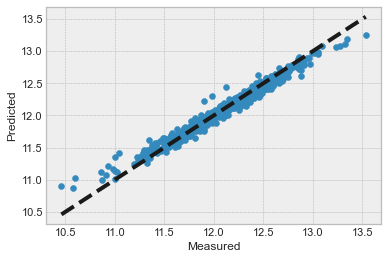

In [142]:
# cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validated:
predicted = y_pred_test_Forestreg

fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Conclusion:
#### * Columns like OverallQual,GrLivArea,Neighborhood,YearBuilt,ExterQual,FullBath,TotalBsmtSF,KitchenQual,GarageArea,1stFlrSF,GarageCars & GarageType have effect on Flight Price.
#### * The Actual vs Predicted plot clearly indicates the predicted values are almost linear hence performance of model is considerably Good
#### * Random Forest Regressor model predicts the Flight price more accurately than Decision Tree.